## CM4044: AI In Chemistry
## Semester 1 2019/20

<hr>

## Tutorial 2b: Introduction to Matplotlib Part II
## Objectives
### $\bullet$ Several Plots in the Same Figure
### $\bullet$ Other 2D Plots
### $\bullet$ 3D Plots

<hr>


In [1]:
%matplotlib inline

## 1. Several Plots in the Same Figure

Sometimes it is useful to arrange several plots in the same figure. 

The function `add_axes()` of a `Figure` object can be used to exactly place an `Axes` object at precise position based on pass-in arguments . For example,

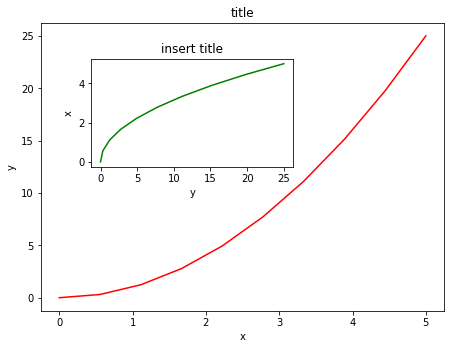

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 

x = np.linspace(0, 5, 10)
y = x ** 2

fig = plt.figure(figsize=(7,5))

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes  [x, y, width, height]
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes [x, y, width, height]

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title')

# function to show the plot 
plt.show()

Another useful function is `pyplot.subplots()`, which creates one `Figure` object and one or several `Axes` object(s) based on the pass-in arguments. Matplotlib automatcially handles the `Axes` object's position and size.

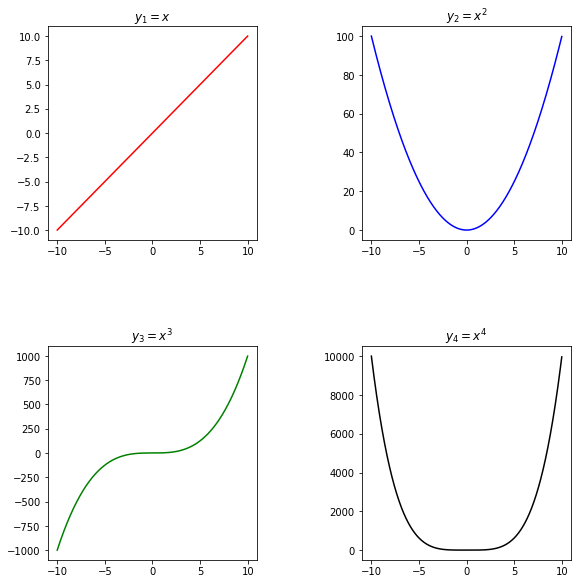

In [3]:
import matplotlib.pyplot as plt 
import numpy as np 
  
# function to generate data
def data_to_plot(ptype): 
    # setting the x-axis vaues 
    x = np.arange(-10, 10, 0.01) 
      
    # setting the y-axis values 
    if ptype == 'linear': 
        y = x 
    elif ptype == 'quadratic': 
        y = x**2
    elif ptype == 'cubic': 
        y = x**3
    elif ptype == 'quartic': 
        y = x**4
              
    return(x, y) 
  
# setting style to ggplot, which is popular in R
# plt.style.use('ggplot') 
  
# subplots creates figure and several axes object
# the number of axes object depend on input arguments
# nrow = 2, ncol = 2
fig, axes = plt.subplots(2,2, figsize=(8,8))

fig.tight_layout()

# in the previous line, axes is a 2 x 2 array
# convert it into 1D array for easy indexing later.
axes = axes.flatten()

# plotting points on each subplot 
x, y = data_to_plot('linear') 
axes[0].plot(x, y, color ='r') 
axes[0].set_title('$y_1 = x$') 
  
x, y = data_to_plot('quadratic') 
axes[1].plot(x, y, color ='b') 
axes[1].set_title('$y_2 = x^2$') 
  
x, y = data_to_plot('cubic') 
axes[2].plot(x, y, color ='g') 
axes[2].set_title('$y_3 = x^3$') 
  
x, y = data_to_plot('quartic') 
axes[3].plot(x, y, color ='k') 
axes[3].set_title('$y_4 = x^4$') 
  
# adjusting space between subplots 
fig.subplots_adjust(hspace=.5,wspace=0.5) 
  
# function to show the plot 
plt.show()

## 2. Other 2D Plots

Matplotlib also provides a number of other types of plots. There is a gallery of the demostrations [here](https://matplotlib.org/gallery.html). Some of the popular plots are: bar, step, pie, histogram, and scatter plot. An example below:

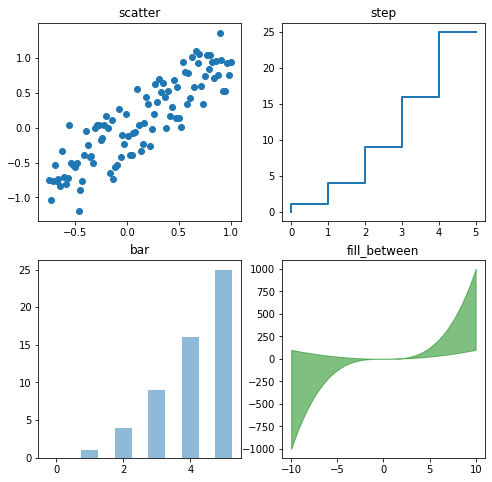

In [4]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

n = np.array([0,1,2,3,4,5])
xx = np.linspace(-0.75, 1., 100)

fig, axes = plt.subplots(2, 2, figsize=(8,8))

axes[0][0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0][0].set_title("scatter")

axes[0][1].step(n, n**2, lw=2)
axes[0][1].set_title("step")

axes[1][0].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[1][0].set_title("bar")

axes[1][1].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[1][1].set_title("fill_between");

# Show result on screen
plt.show()

Here is an example to plot pie chart.

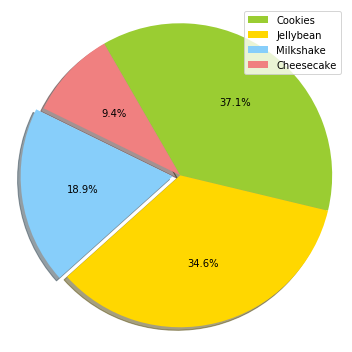

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))

labels = ['Cookies', 'Jellybean', 'Milkshake', 'Cheesecake']
sizes = [40.6, 37.9, 20.7, 10.3]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

explode = (0., 0, 0.05, 0)  # explode 3rd slices
patches, texts, autotexts = ax.pie(sizes, counterclock=False, explode=explode, autopct='%1.1f%%',colors=colors, shadow=True, startangle=120)

ax.legend(patches, labels, loc="best")
ax.axis('equal')
fig.tight_layout()
plt.show()


A histogram shows the frequency on the vertical axis and the horizontal axis is another dimension. Usually it has bins, where every bin has a minimum and maximum value. Each bin also has a frequency between x and infinite. 

Many things can be added to a histogram such as a fit line, labels and so on. The code below creates an advanced histogram.

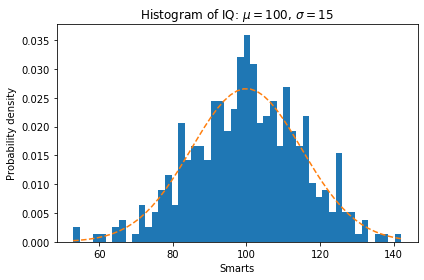

In [6]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

A very useful 2D plot in science is contour plot. A contour line (also isoline, isopleth, or isarithm) of a function of two variables is a curve along which the function has a constant value, so that the curve joins points of equal value. It is a plane section of the three-dimensional graph of the function f(x, y) parallel to the x, y plane. See the example below:

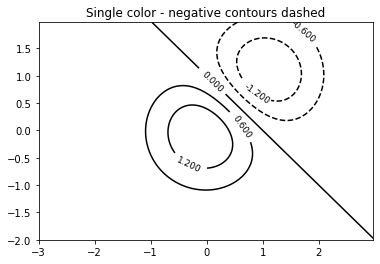

In [7]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()

CS = ax.contour(X, Y, Z, 6,
                 colors='k',  # negative contours will be dashed by default
                 )
ax.clabel(CS, fontsize=9, inline=1)
ax.set_title('Single color - negative contours dashed')
plt.show()


## 3. 3D Plots

Matplotlib also supports plot in 3D. To plot 3D graphs, we need to create an instance of the `Axes3D` class. 3D axes can be added to a matplotlib figure canvas in exactly the same way as 2D axes; or, more conveniently, by passing a projection='3d' keyword argument to the add_axes or add_subplot methods. Below are several examples for plotting different 3D graphs.

## 3.1 3D Surface 

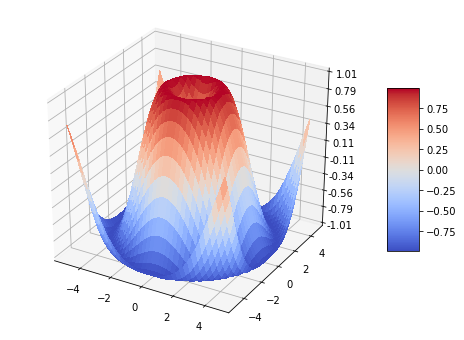

In [8]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(8,6))
# get the current Axes object in the Figure
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


## 3.2 3D Line and Scatter Points

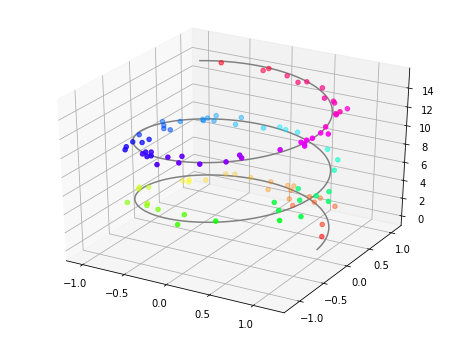

In [9]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')

z_line = np.linspace(0, 15, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')

z_points = 15 * np.random.random(100)
x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()

## 3.3 3D Bar 

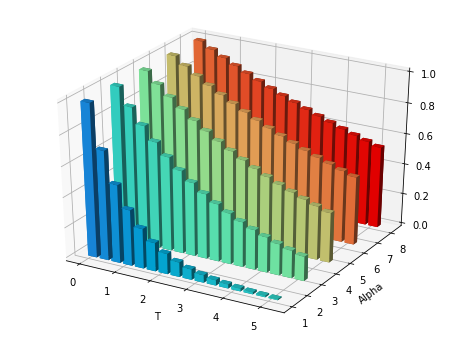

In [10]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

# Data generation
alpha = np.linspace(1, 8, 5)
t = np.linspace(0, 5, 16)
T, A = np.meshgrid(t, alpha)
data = np.exp(-T * (1. / A))

# Plotting
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection = '3d')

Xi = T.flatten()
Yi = A.flatten()
Zi = np.zeros(data.size)

dx = .25 * np.ones(data.size)
dy = .25 * np.ones(data.size)
dz = data.flatten()

ax.set_xlabel('T')
ax.set_ylabel('Alpha')

colors = cm.rainbow( [0.2 + (1-0.2)/(len(Xi)-1)*i for i in range(len(Xi))] )

ax.bar3d(Xi, Yi, Zi, dx, dy, dz, color = colors)

plt.show()

More examples on 3D graphics can be founded [here](https://matplotlib.org/3.1.0/gallery/index.html)